In [64]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
# from natsort import natsorted
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
# import shap
from sklearn.preprocessing import LabelEncoder
from scipy.spatial.transform import Rotation as R

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from scipy.signal import correlate
from sklearn.ensemble import ExtraTreesClassifier
from scipy.stats import entropy
from scipy.fft import fft, fftfreq
from scipy.stats import kurtosis, skew


In [66]:
data_train_file_1   = pd.read_csv('/content/drive/My Drive/OpenPack dataset S1/Data/Gen_data/File_1.csv')
data_train_file_4   = pd.read_csv('/content/drive/My Drive/OpenPack dataset S1/Data/Gen_data/File_4.csv')

data_test_file_2    = pd.read_csv('/content/drive/My Drive/OpenPack dataset S1/Data/Gen_data/File_2.csv')



In [67]:
# data_train = pd.concat([data_train_file_1, data_train_file_4], ignore_index=True)

In [68]:
def prepro_data(data):
  data = data.drop(['Unnamed: 0', 'action'], axis = 1)
  data['operation'] = data['operation'].astype('category')
  return data

In [69]:
# data_train = data_train.drop(['Unnamed: 0', 'action'], axis = 1)
# data_train['operation'] = data_train['operation'].astype('category')

# data_test_file_2 = data_test_file_2.drop(['Unnamed: 0', 'action'], axis = 1)
# data_test_file_2['operation'] = data_test_file_2['operation'].astype('category')



In [70]:
data_train_file_1 = prepro_data(data_train_file_1)
data_test_file_2 = prepro_data(data_test_file_2)
data_train_file_4 = prepro_data(data_train_file_4)


In [71]:
# c()

In [72]:

# def angle_from_quaternion(data, wrist, upper):
#   q_wrist = np.array([
#     data[f"atr0{wrist}/quat_x"],
#     data[f"atr0{wrist}/quat_y"],
#     data[f"atr0{wrist}/quat_z"],
#     data[f"atr0{wrist}/quat_w"]
#   ])
#   q_upper = np.array([
#     data[f"atr0{upper}/quat_x"],
#     data[f"atr0{upper}/quat_y"],
#     data[f"atr0{upper}/quat_z"],
#     data[f"atr0{upper}/quat_w"]
#   ])
#   R_upper = R.from_quat(q_upper)
#   R_wrist = R.from_quat(q_wrist)
#   R_rel = R_upper.inv() * R_wrist
#   return R_rel.magnitude()

# def quat_deviation(q_current, q_ref):
#   R_current = R.from_quat(q_current)
#   R_ref = R.from_quat(q_ref)
#   R_diff = R_ref.inv() * R_current
#   return R_diff.magnitude()

# def compute_angular_acceleration(gyro: np.ndarray) -> np.ndarray:
#   dt = 1.0 / 30
#   return np.gradient(gyro, axis=0) / dt

# def compute_jerk(acc: np.ndarray) -> np.ndarray:
#   dt = 1.0 / 30
#   return np.gradient(acc, axis=0) / dt

# def integrate_velocity(acc: np.ndarray) -> np.ndarray:
#   dt = 1.0 / 30
#   velocity = np.cumsum(acc * dt, axis=0)
#   return velocity

# def feature_extract(data):
#   # Mag for acc, gyro, quat
#   for i in range(1,5):
#     acc_x, acc_y, acc_z = f'atr0{i}/acc_x', f'atr0{i}/acc_y', f'atr0{i}/acc_z'
#     gyro_x, gyro_y, gyro_z = f'atr0{i}/gyro_x', f'atr0{i}/gyro_y', f'atr0{i}/gyro_z'
#     quat_w, quat_x, quat_y, quat_z = f'atr0{i}/quat_w', f'atr0{i}/quat_x', f'atr0{i}/quat_y', f'atr0{i}/quat_z'

#     data[f'atr0{i}/acc_mag']          = np.sqrt(data[acc_x]**2  + data[acc_y]**2  + data[acc_z]**2)
#     data[f'atr0{i}/acc_mag_xy']       = np.sqrt(data[acc_x]**2  + data[acc_y]**2)
#     data[f'atr0{i}/gyro_mag']         = np.sqrt(data[gyro_x]**2 + data[gyro_y]**2 + data[gyro_z]**2)
#     data[f'atr0{i}/quat_mag']         = np.sqrt(data[quat_w]**2 + data[quat_x]**2 + data[quat_y]**2 + data[quat_z]**2)


#   # Diff mag
#   data['acc_mag_diff_01_02']          = (data['atr01/acc_mag'] - data['atr02/acc_mag']).abs()
#   data['acc_mag_diff_03_04']          = (data['atr03/acc_mag'] - data['atr04/acc_mag']).abs()
#   data['acc_mag_diff_01_03']          = (data['atr01/acc_mag'] - data['atr03/acc_mag']).abs()
#   data['acc_mag_diff_02_04']          = (data['atr02/acc_mag'] - data['atr04/acc_mag']).abs()


#   # Angle
#   data["Right_angle_radian"]          = data.apply(lambda row: angle_from_quaternion(row, wrist=1, upper=3), axis=1)
#   data["Left_angle_radian"]           = data.apply(lambda row: angle_from_quaternion(row, wrist=2, upper=4), axis=1)


#   # Euler
#   for i in range(1,5):
#     q = data[[f'atr0{i}/quat_w', f'atr0{i}/quat_x', f'atr0{i}/quat_y', f'atr0{i}/quat_z']].values
#     euler = R.from_quat(q).as_euler('xyz', degrees=True)
#     data[f'atr0{i}/roll'] = euler[:, 0]
#     data[f'atr0{i}/pitch'] = euler[:, 1]
#     data[f'atr0{i}/yaw'] = euler[:, 2]


#     # Độ lệch quaternion so với trạng thái nghỉ
#   for i in range(1,5):
#     q_ref = data[[f'atr0{i}/quat_w', f'atr0{i}/quat_x', f'atr0{i}/quat_y', f'atr0{i}/quat_z']].iloc[0].values
#     data[f'atr0{i}/quat_deviation'] = data.apply(lambda row: quat_deviation( [row[f'atr0{i}/quat_w'], row[f'atr0{i}/quat_x'], row[f'atr0{i}/quat_y'], row[f'atr0{i}/quat_z']], q_ref ), axis=1)


#   # Tính Angular Acceleration (gia tốc góc)
#   for i in range(1, 3):
#     gyro_cols = [f'atr0{i}/gyro_x', f'atr0{i}/gyro_y', f'atr0{i}/gyro_z']
#     gyro_data = data[gyro_cols].to_numpy()
#     ang_acc = compute_angular_acceleration(gyro_data)
#     data[f'atr0{i}/ang_acc_x'] = ang_acc[:, 0]
#     data[f'atr0{i}/ang_acc_y'] = ang_acc[:, 1]
#     data[f'atr0{i}/ang_acc_z'] = ang_acc[:, 2]
#     data[f'atr0{i}/ang_acc_mag'] = np.linalg.norm(ang_acc, axis=1)

#   # Tính Jerk
#   for i in range(1,3):
#     acc_cols = [f'atr0{i}/acc_x', f'atr0{i}/acc_y', f'atr0{i}/acc_z']
#     acc_data = data[acc_cols].to_numpy()
#     jerk = compute_jerk(acc_data)
#     data[f'atr0{i}/jerk_x'] = jerk[:, 0]
#     data[f'atr0{i}/jerk_y'] = jerk[:, 1]
#     data[f'atr0{i}/jerk_z'] = jerk[:, 2]
#     data[f'atr0{i}/jerk_mag'] = np.linalg.norm(jerk, axis=1)

#   # Tính Linear Velocity (vận tốc tuyến tính)
#   for i in range(3,5):
#     acc_cols = [f'atr0{i}/acc_x', f'atr0{i}/acc_y', f'atr0{i}/acc_z']
#     acc_data = data[acc_cols].to_numpy()
#     vel = integrate_velocity(acc_data)
#     data['atr01/vel_x'] = vel[:, 0]
#     data['atr01/vel_y'] = vel[:, 1]
#     data['atr01/vel_z'] = vel[:, 2]
#     data['atr01/vel_mag'] = np.linalg.norm(vel, axis=1)



#   return data

In [73]:

def angle_from_quaternion(q_upper, q_wrist):
  """Tính góc quay tương đối giữa hai khớp dùng quaternion (vectorized)"""
  R_upper = R.from_quat(q_upper)
  R_wrist = R.from_quat(q_wrist)
  R_rel = R_upper.inv() * R_wrist
  return R_rel.magnitude()

def quat_deviation(q_current, q_ref):
  """Tính độ lệch quaternion so với tham chiếu (vectorized)"""
  R_current = R.from_quat(q_current)
  R_ref = R.from_quat(q_ref)
  R_diff = R_ref.inv() * R_current
  return R_diff.magnitude()

def compute_angular_acceleration(gyro: np.ndarray, dt: float = 1/30) -> np.ndarray:
  """Tính gia tốc góc từ dữ liệu con quay"""
  return np.gradient(gyro, axis=0) / dt

def compute_jerk(acc: np.ndarray, dt: float = 1/30) -> np.ndarray:
  """Tính jerk từ dữ liệu gia tốc"""
  return np.gradient(acc, axis=0) / dt

def integrate_velocity(acc: np.ndarray, dt: float = 1/30) -> np.ndarray:
  """Tích phân gia tốc -> vận tốc với drift compensation đơn giản"""
  velocity = np.cumsum(acc * dt, axis=0)
  velocity -= np.mean(velocity, axis=0)  # Giảm drift
  return velocity

def feature_extract(data):
  # ===================================================================
  # 1. Tính độ lớn (magnitude) cho các tín hiệu
  # ===================================================================
  for i in range(1, 5):
    prefix = f'atr0{i}'

    # Magnitude calculations
    data[f'{prefix}/acc_mag'] = np.linalg.norm(data[[f'{prefix}/acc_x', f'{prefix}/acc_y', f'{prefix}/acc_z']], axis=1)
    data[f'{prefix}/acc_mag_xy'] = np.linalg.norm(data[[f'{prefix}/acc_x', f'{prefix}/acc_y']], axis=1)
    data[f'{prefix}/gyro_mag'] = np.linalg.norm(data[[f'{prefix}/gyro_x', f'{prefix}/gyro_y', f'{prefix}/gyro_z']], axis=1)
    data[f'{prefix}/quat_mag'] = np.linalg.norm(data[[f'{prefix}/quat_w', f'{prefix}/quat_x', f'{prefix}/quat_y', f'{prefix}/quat_z']], axis=1)

  # ===================================================================
  # 2. Tính toán chênh lệch giữa các sensor
  # ===================================================================
  data['acc_mag_diff_01_02'] = (data['atr01/acc_mag'] - data['atr02/acc_mag']).abs()
  data['acc_mag_diff_03_04'] = (data['atr03/acc_mag'] - data['atr04/acc_mag']).abs()
  data['acc_mag_diff_01_03'] = (data['atr01/acc_mag'] - data['atr03/acc_mag']).abs()
  data['acc_mag_diff_02_04'] = (data['atr02/acc_mag'] - data['atr04/acc_mag']).abs()

  # ===================================================================
  # 3. Tính góc khớp tương đối (Vectorized)
  # ===================================================================
  # Right arm (sensor 1 vs 3)
  q_upper_right = data[['atr03/quat_x', 'atr03/quat_y', 'atr03/quat_z', 'atr03/quat_w']].values
  q_wrist_right = data[['atr01/quat_x', 'atr01/quat_y', 'atr01/quat_z', 'atr01/quat_w']].values
  data["Right_angle_radian"] = angle_from_quaternion(q_upper_right, q_wrist_right)

  # Left arm (sensor 2 vs 4)
  q_upper_left = data[['atr04/quat_x', 'atr04/quat_y', 'atr04/quat_z', 'atr04/quat_w']].values
  q_wrist_left = data[['atr02/quat_x', 'atr02/quat_y', 'atr02/quat_z', 'atr02/quat_w']].values
  data["Left_angle_radian"] = angle_from_quaternion(q_upper_left, q_wrist_left)

  # ===================================================================
  # 4. Chuyển đổi Euler angles (Vectorized)
  # ===================================================================
  for i in range(1, 5):
    prefix = f'atr0{i}'
    q = data[[f'{prefix}/quat_x', f'{prefix}/quat_y', f'{prefix}/quat_z', f'{prefix}/quat_w']].values
    euler = R.from_quat(q).as_euler('xyz', degrees=True)
    data[f'{prefix}/roll'] = euler[:, 0]
    data[f'{prefix}/pitch'] = euler[:, 1]
    data[f'{prefix}/yaw'] = euler[:, 2]

  # ===================================================================
  # 5. Tính độ lệch quaternion (Vectorized)
  # ===================================================================
  for i in range(1, 5):
    prefix = f'atr0{i}'
    q_ref = data[[f'{prefix}/quat_x', f'{prefix}/quat_y', f'{prefix}/quat_z', f'{prefix}/quat_w']].iloc[0].values
    q_current = data[[f'{prefix}/quat_x', f'{prefix}/quat_y', f'{prefix}/quat_z', f'{prefix}/quat_w']].values
    data[f'{prefix}/quat_deviation'] = quat_deviation(q_current, q_ref)

  # ===================================================================
  # 6. Tính toán động học (Angular acceleration, Jerk, Velocity)
  # ===================================================================
  # Angular acceleration cho cổ tay (sensor 1,2)
  for i in range(1, 5):
    prefix = f'atr0{i}'
    gyro_data = data[[f'{prefix}/gyro_x', f'{prefix}/gyro_y', f'{prefix}/gyro_z']].values
    ang_acc = compute_angular_acceleration(gyro_data)
    data[f'{prefix}/ang_acc_x'] = ang_acc[:, 0]
    data[f'{prefix}/ang_acc_y'] = ang_acc[:, 1]
    data[f'{prefix}/ang_acc_z'] = ang_acc[:, 2]
    data[f'{prefix}/ang_acc_mag'] = np.linalg.norm(ang_acc, axis=1)

  # Jerk cho cổ tay (sensor 1,2)
  for i in range(1, 5):
    prefix = f'atr0{i}'
    acc_data = data[[f'{prefix}/acc_x', f'{prefix}/acc_y', f'{prefix}/acc_z']].values
    jerk = compute_jerk(acc_data)
    data[f'{prefix}/jerk_x'] = jerk[:, 0]
    data[f'{prefix}/jerk_y'] = jerk[:, 1]
    data[f'{prefix}/jerk_z'] = jerk[:, 2]
    data[f'{prefix}/jerk_mag'] = np.linalg.norm(jerk, axis=1)

  # Velocity cho cánh tay trên (sensor 3,4)
  for i in range(1, 5):
    prefix = f'atr0{i}'
    acc_data = data[[f'{prefix}/acc_x', f'{prefix}/acc_y', f'{prefix}/acc_z']].values
    vel = integrate_velocity(acc_data)
    data[f'{prefix}/vel_x'] = vel[:, 0]
    data[f'{prefix}/vel_y'] = vel[:, 1]
    data[f'{prefix}/vel_z'] = vel[:, 2]
    data[f'{prefix}/vel_mag'] = np.linalg.norm(vel, axis=1)

  return data

In [74]:
# data_train_file_1 = prepro_data(data_train_file_1)
# data_test_file_2 = prepro_data(data_test_file_2)
# data_train_file_4 = prepro_data(data_train_file_4)


In [75]:
data_test_file_2       = feature_extract(data_test_file_2)
data_train_file_1       = feature_extract(data_train_file_1)
data_train_file_4      = feature_extract(data_train_file_4)

In [76]:
# def extract_features_sliding_window(df, window_size=30, step_size=15, selected_columns=None, corr_pairs=None, use_fft=False, sampling_rate=30):

#   feature_list = []

#   if selected_columns is None:
#     selected_columns = df.columns.tolist()

#   # Slide window
#   for start in range(0, len(df) - window_size + 1, step_size):
#     end = start + window_size
#     window = df.iloc[start:end]
#     feature_dict = {'start_idx': start, 'end_idx': end}

#     # --- Đặc trưng thống kê & FFT cho từng cột ---
#     for col in selected_columns:
#         if col in window.columns:
#           signal = window[col].values
#           feature_dict[f'{col}_max'] = np.max(signal)
#           feature_dict[f'{col}_min'] = np.min(signal)
#           feature_dict[f'{col}_median'] = np.median(signal)
#           feature_dict[f'{col}_kurtosis'] = kurtosis(signal)
#           feature_dict[f'{col}_skewness'] = skew(signal)

#           if use_fft:
#             fft_vals = np.abs(fft(signal))
#             fft_freqs = fftfreq(len(signal), d=1/sampling_rate)
#             half_n = len(fft_vals) // 2
#             fft_vals_half = fft_vals[:half_n]
#             fft_freqs_half = fft_freqs[:half_n]

#             feature_dict[f'{col}_fft_energy'] = np.sum(fft_vals_half**2)
#             feature_dict[f'{col}_fft_max_amp'] = np.max(fft_vals_half)
#             feature_dict[f'{col}_fft_dominant_freq'] = np.abs(fft_freqs_half[np.argmax(fft_vals_half)])

#     # --- Tính correlation cho các cặp chỉ định ---
#     if corr_pairs:
#         for col1, col2 in corr_pairs:
#           if col1 in window.columns and col2 in window.columns:
#             corr = window[[col1, col2]].corr().iloc[0, 1]
#             feature_dict[f'{col1}_{col2}_corr'] = corr
#           else:
#             feature_dict[f'{col1}_{col2}_corr'] = np.nan

#     feature_list.append(feature_dict)

#   return pd.DataFrame(feature_list)

In [77]:
def extract_features_sliding_window(df, window_size=30, step_size=15, selected_columns=None,
                                      corr_pairs=None, use_fft=False, sampling_rate=30):
    feature_list = []

    # Nếu người dùng không chỉ định cột tính toán, hãy loại trừ cột 'operation'
    if selected_columns is None:
        selected_columns = [col for col in df.columns if col != 'operation']

    # Lặp qua các cửa sổ
    for start in range(0, len(df) - window_size + 1, step_size):
        end = start + window_size
        window = df.iloc[start:end]

        # Tạo dictionary gốc cho cửa sổ, có thể thêm thông tin về chỉ số cửa sổ
        feature_dict = {'start_idx': start, 'end_idx': end}

        # Gắn nhãn target: Lấy mode (giá trị xuất hiện nhiều nhất) của cột 'operation'
        if 'operation' in df.columns:
            feature_dict['operation'] = window['operation'].mode()[0]

        # Tính các đặc trưng cho từng cột (chỉ với các cột số)
        for col in selected_columns:
            if col in window.columns:
                signal = window[col].values
                feature_dict[f"{col}_max"] = np.max(signal)
                feature_dict[f"{col}_min"] = np.min(signal)
                feature_dict[f"{col}_median"] = np.median(signal)
                feature_dict[f"{col}_kurtosis"] = kurtosis(signal)
                feature_dict[f"{col}_skewness"] = skew(signal)

                # Nếu bật chế độ FFT, tính các đặc trưng liên quan đến tần số
                if use_fft:
                    fft_vals = np.abs(fft(signal))
                    fft_freqs = fftfreq(len(signal), d=1/sampling_rate)
                    half_n = len(fft_vals) // 2
                    fft_vals_half = fft_vals[:half_n]
                    fft_freqs_half = fft_freqs[:half_n]
                    feature_dict[f"{col}_fft_energy"] = np.sum(fft_vals_half**2)
                    feature_dict[f"{col}_fft_max_amp"] = np.max(fft_vals_half)
                    feature_dict[f"{col}_fft_dominant_freq"] = np.abs(fft_freqs_half[np.argmax(fft_vals_half)])

        # Nếu bạn có các cặp muốn tính hệ số tương quan, có thể thêm ở đây.
        if corr_pairs:
            for col1, col2 in corr_pairs:
                if col1 in window.columns and col2 in window.columns:
                    corr_value = window[[col1, col2]].corr().iloc[0, 1]
                    feature_dict[f"{col1}_{col2}_corr"] = corr_value
                else:
                    feature_dict[f"{col1}_{col2}_corr"] = np.nan

        feature_list.append(feature_dict)

    return pd.DataFrame(feature_list)


In [78]:
# selected_columns = []

# # Magnitude Features
# for i in range(1, 5):
#   prefix = f"atr0{i}"
#   selected_columns += [
#     f"{prefix}/acc_mag", f"{prefix}/acc_mag_xy",
#     f"{prefix}/gyro_mag", f"{prefix}/quat_mag"
#   ]

# # Cross-sensor Magnitude Differences
# selected_columns += [
#   "acc_mag_diff_01_02", "acc_mag_diff_03_04",
#   "acc_mag_diff_01_03", "acc_mag_diff_02_04"
# ]

# # Angles và Quaternion Deviations
# selected_columns += [
#   "Right_angle_radian", "Left_angle_radian",
#   *[f"atr0{i}/quat_deviation" for i in range(1,5)]
# ]

# # Kinematic Features (Angular Acc, Jerk, Velocity)
# kinematic_types = ["ang_acc_x", "ang_acc_y", "ang_acc_z", "ang_acc_mag",
#                    "jerk_x", "jerk_y", "jerk_z", "jerk_mag",
#                    "vel_x", "vel_y", "vel_z", "vel_mag"]
# for i in range(1,5):
#   prefix = f"atr0{i}"
#   selected_columns += [f"{prefix}/{kt}" for kt in kinematic_types]

# # Euler Angles
# euler_angles = ["roll", "pitch", "yaw"]
# for i in range(1,5):
#   prefix = f"atr0{i}"
#   selected_columns += [f"{prefix}/{ea}" for ea in euler_angles]

In [79]:
selected_columns = [
    # Global features
    'Right_angle_radian',
    'Left_angle_radian',
    'acc_mag_diff_01_02',
    'acc_mag_diff_03_04',
    'acc_mag_diff_01_03',
    'acc_mag_diff_02_04',

    # Sensor-specific features (atr01)
    'atr01/acc_mag',
    'atr01/gyro_mag',
    'atr01/roll',
    'atr01/pitch',
    'atr01/yaw',
    'atr01/quat_deviation',
    'atr01/ang_acc_mag',
    'atr01/jerk_mag',
    'atr01/vel_mag',

    # Sensor-specific features (atr02)
    'atr02/acc_mag',
    'atr02/gyro_mag',
    'atr02/roll',
    'atr02/pitch',
    'atr02/yaw',
    'atr02/quat_deviation',
    'atr02/ang_acc_mag',
    'atr02/jerk_mag',
    'atr02/vel_mag',

    # Sensor-specific features (atr03)
    'atr03/acc_mag',
    'atr03/gyro_mag',
    'atr03/roll',
    'atr03/pitch',
    'atr03/yaw',
    'atr03/quat_deviation',
    'atr03/ang_acc_mag',
    'atr03/jerk_mag',
    'atr03/vel_mag',

    # Sensor-specific features (atr04)
    'atr04/acc_mag',
    'atr04/gyro_mag',
    'atr04/roll',
    'atr04/pitch',
    'atr04/yaw',
    'atr04/quat_deviation',
    'atr04/ang_acc_mag',
    'atr04/jerk_mag',
    'atr04/vel_mag'
]

In [80]:
corr_pairs = [
  # Cross-sensor (Cùng bên)
  ("atr01/acc_mag", "atr03/acc_mag"),
  ("atr02/acc_mag", "atr04/acc_mag"),
  ("atr01/vel_mag", "atr03/vel_mag"),
  ("atr01/quat_deviation", "atr03/quat_deviation"),

  # Đối xứng trái-phải
  ("atr01/acc_mag", "atr02/acc_mag"),
  ("atr03/gyro_mag", "atr04/gyro_mag"),
  ("Right_angle_radian", "Left_angle_radian"),

  # Cùng sensor (Đa modal)
  ("atr01/acc_mag", "atr01/gyro_mag"),
  ("atr01/jerk_mag", "atr01/ang_acc_mag"),
  ("atr01/vel_mag", "atr01/quat_deviation"),

  # Euler Angles
  ("atr03/roll", "atr01/roll"),
  ("atr04/pitch", "atr02/pitch")
]

In [81]:
# data_train_file_1 = prepro_data(data_train_file_1)
# data_test_file_2 = prepro_data(data_test_file_2)
# data_train_file_4 = prepro_data(data_train_file_4)


In [82]:
# Sau khi chạy feature_extract(data)
data_test_file_2 = extract_features_sliding_window(
    df=data_test_file_2,
    window_size=30,    # 1 giây (tần số 30Hz)
    step_size=15,       # Overlap 50%
    selected_columns=selected_columns,
    corr_pairs=corr_pairs,
    use_fft=True,       # Bật FFT nếu cần phân tích tần số
    sampling_rate=30    # Phải khớp với tần số thực tế
)


data_train_file_1 = extract_features_sliding_window(
    df=data_train_file_1,
    window_size=30,    # 1 giây (tần số 30Hz)
    step_size=15,       # Overlap 50%
    selected_columns=selected_columns,
    corr_pairs=corr_pairs,
    use_fft=True,       # Bật FFT nếu cần phân tích tần số
    sampling_rate=30    # Phải khớp với tần số thực tế
)

data_train_file_4 = extract_features_sliding_window(
    df=data_train_file_4,
    window_size=30,    # 1 giây (tần số 30Hz)
    step_size=15,       # Overlap 50%
    selected_columns=selected_columns,
    corr_pairs=corr_pairs,
    use_fft=True,       # Bật FFT nếu cần phân tích tần số
    sampling_rate=30    # Phải khớp với tần số thực tế
)

In [83]:
data_train = pd.concat([data_train_file_1, data_train_file_4], ignore_index=True)

In [84]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9893 entries, 0 to 9892
Columns: 351 entries, start_idx to atr04/pitch_atr02/pitch_corr
dtypes: float64(348), int64(3)
memory usage: 26.5 MB


In [85]:
data_test_file_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4318 entries, 0 to 4317
Columns: 351 entries, start_idx to atr04/pitch_atr02/pitch_corr
dtypes: float64(348), int64(3)
memory usage: 11.6 MB


In [86]:
data_test_file_2.head()

,start_idx,end_idx,operation,Right_angle_radian_max,Right_angle_radian_min,Right_angle_radian_median,Right_angle_radian_kurtosis,Right_angle_radian_skewness,Right_angle_radian_fft_energy,Right_angle_radian_fft_max_amp,...,atr01/vel_mag_atr03/vel_mag_corr,atr01/quat_deviation_atr03/quat_deviation_corr,atr01/acc_mag_atr02/acc_mag_corr,atr03/gyro_mag_atr04/gyro_mag_corr,Right_angle_radian_Left_angle_radian_corr,atr01/acc_mag_atr01/gyro_mag_corr,atr01/jerk_mag_atr01/ang_acc_mag_corr,atr01/vel_mag_atr01/quat_deviation_corr,atr03/roll_atr01/roll_corr,atr04/pitch_atr02/pitch_corr
0,0,30,100,3.104949,1.175178,2.587669,-0.327286,-0.945593,5454.840989,72.835266,...,0.998936,0.111473,0.162430,0.606406,0.109817,0.078088,0.154358,-0.084020,-0.272967,0.083639
1,15,45,100,3.037237,1.047432,2.393561,-1.127435,-0.478832,4426.791886,65.395115,...,0.999342,0.136660,-0.029061,0.581625,0.459085,-0.136831,0.162358,0.069539,0.018938,-0.178099
2,30,60,100,3.037237,1.047432,1.924197,-0.974351,0.297882,3765.769575,60.352326,...,0.999120,0.164217,-0.063047,0.407693,0.274479,0.426569,0.220147,-0.447455,-0.013455,-0.302959
3,45,75,100,3.020759,0.936995,2.135951,-0.333639,-0.365158,4020.354523,62.545339,...,0.998512,0.008690,0.007583,0.587778,0.215008,0.617895,0.343974,-0.167516,-0.559041,0.166922
4,60,90,100,3.020759,0.936995,2.309837,1.395961,-1.053651,4441.521708,65.988216,...,0.996680,-0.190135,0.471602,0.787299,-0.000504,0.051190,0.443534,0.371467,-0.320918,-0.230686


In [87]:
data_train = data_train.drop(['start_idx', 'end_idx'], axis = 1)
data_test_file_2 = data_test_file_2.drop(['start_idx', 'end_idx'], axis = 1)

In [88]:
print("Kích thước dữ liệu train:", data_train.shape)
print("Kích thước dữ liệu test:", data_test_file_2.shape)

data_train.dropna(inplace=True)
data_test_file_2.dropna(inplace=True)


print("Kích thước dữ liệu train:", data_train.shape)
print("Kích thước dữ liệu test:", data_test_file_2.shape)

Kích thước dữ liệu train: (9893, 349)
Kích thước dữ liệu test: (4318, 349)
Kích thước dữ liệu train: (9893, 349)
Kích thước dữ liệu test: (4318, 349)


In [89]:
target = "operation"

X_train = data_train.drop(target, axis=1)
y_train = data_train[target]

X_test = data_test_file_2.drop(target, axis=1)
y_test = data_test_file_2[target]

In [90]:

# Mã hóa nhãn
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

print("Trước SMOTE:", pd.Series(y_train_encoded).value_counts())
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train_encoded)
print("Sau SMOTE:", pd.Series(y_train_resampled).value_counts())

print("Nhãn trong y_train_resampled:", np.unique(y_train_resampled))
print("Nhãn trong y_test_encoded:", np.unique(y_test_encoded))


Trước SMOTE: 2     1514
0     1387
1     1339
6     1188
3     1184
4      851
7      638
9      602
5      412
10     399
8      379
Name: count, dtype: int64
Sau SMOTE: 0     1514
1     1514
2     1514
10    1514
3     1514
4     1514
5     1514
6     1514
7     1514
8     1514
9     1514
Name: count, dtype: int64
Nhãn trong y_train_resampled: [ 0  1  2  3  4  5  6  7  8  9 10]
Nhãn trong y_test_encoded: [ 0  1  2  3  4  5  6  7  8  9 10]



🔍 Đang huấn luyện mô hình: Random Forest
              precision    recall  f1-score   support

         100       0.49      0.98      0.65       436
         200       0.48      0.50      0.49       709
         300       0.86      0.83      0.85       616
         400       0.84      0.93      0.88       426
         500       0.88      0.52      0.65       330
         600       0.05      0.03      0.04       172
         700       0.70      0.69      0.69       676
         800       0.77      0.56      0.65       298
         900       0.76      0.27      0.40       253
        1000       0.63      0.41      0.50       324
        8100       0.08      0.18      0.12        78

    accuracy                           0.63      4318
   macro avg       0.60      0.54      0.54      4318
weighted avg       0.66      0.63      0.62      4318



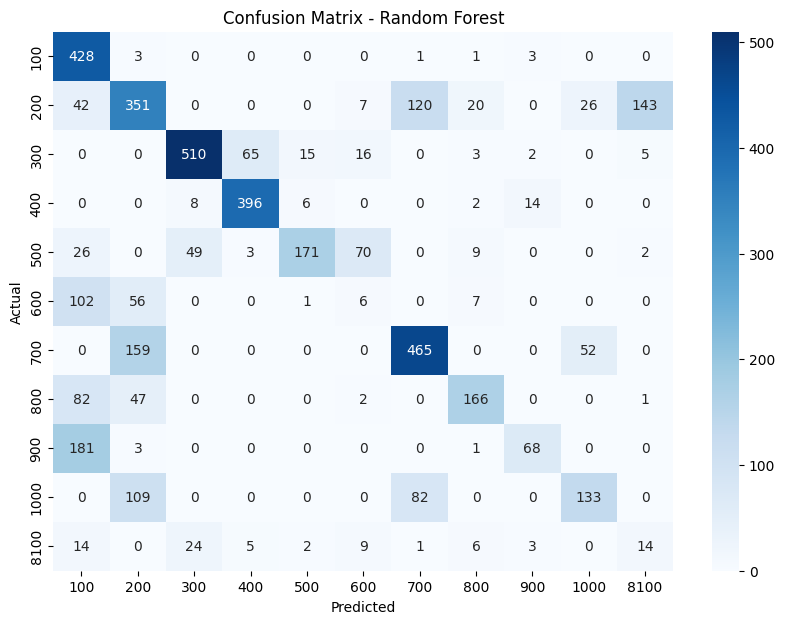


🔍 Đang huấn luyện mô hình: Logistic Regression


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         100       0.48      0.36      0.41       436
         200       0.47      0.31      0.37       709
         300       0.49      0.33      0.40       616
         400       0.84      0.81      0.82       426
         500       0.36      0.15      0.21       330
         600       0.15      0.18      0.16       172
         700       0.60      0.63      0.61       676
         800       0.41      0.54      0.47       298
         900       0.38      0.87      0.53       253
        1000       0.21      0.28      0.24       324
        8100       0.02      0.05      0.03        78

    accuracy                           0.44      4318
   macro avg       0.40      0.41      0.39      4318
weighted avg       0.47      0.44      0.44      4318



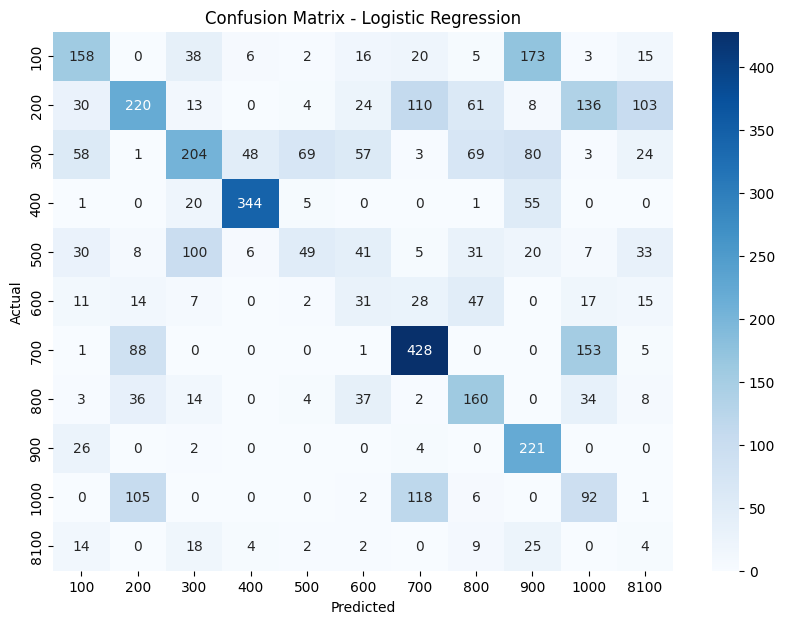


🔍 Đang huấn luyện mô hình: Extra Trees
              precision    recall  f1-score   support

         100       0.45      0.98      0.62       436
         200       0.56      0.57      0.57       709
         300       0.83      0.88      0.85       616
         400       0.87      0.96      0.91       426
         500       0.93      0.47      0.62       330
         600       0.05      0.02      0.03       172
         700       0.67      0.81      0.73       676
         800       0.84      0.49      0.62       298
         900       0.86      0.25      0.38       253
        1000       0.77      0.35      0.48       324
        8100       0.12      0.12      0.12        78

    accuracy                           0.65      4318
   macro avg       0.63      0.54      0.54      4318
weighted avg       0.69      0.65      0.63      4318



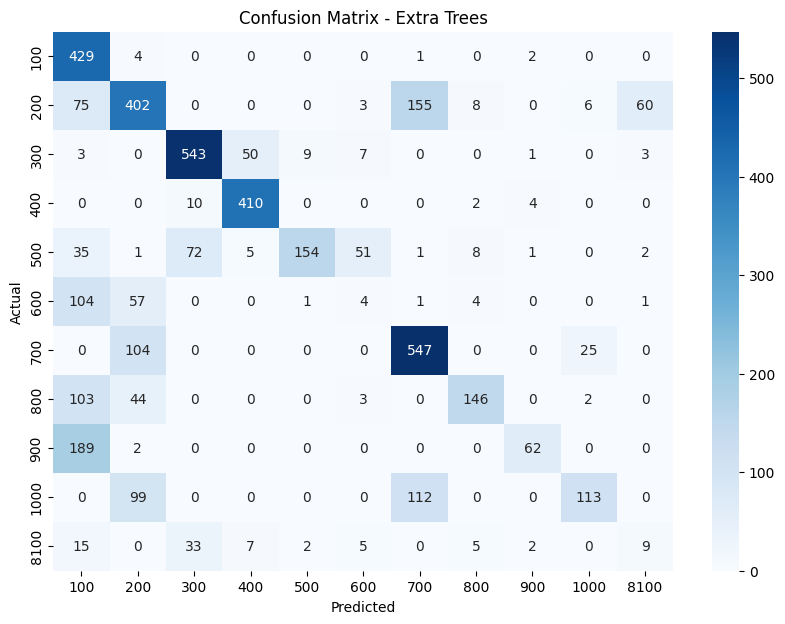


🔍 Đang huấn luyện mô hình: KNN (K-Nearest Neighbors)
              precision    recall  f1-score   support

         100       0.33      0.61      0.43       436
         200       0.56      0.38      0.45       709
         300       0.48      0.26      0.34       616
         400       0.76      0.61      0.68       426
         500       0.17      0.09      0.11       330
         600       0.12      0.19      0.15       172
         700       0.59      0.73      0.65       676
         800       0.35      0.24      0.28       298
         900       0.28      0.28      0.28       253
        1000       0.23      0.24      0.23       324
        8100       0.02      0.09      0.04        78

    accuracy                           0.40      4318
   macro avg       0.35      0.34      0.33      4318
weighted avg       0.44      0.40      0.40      4318



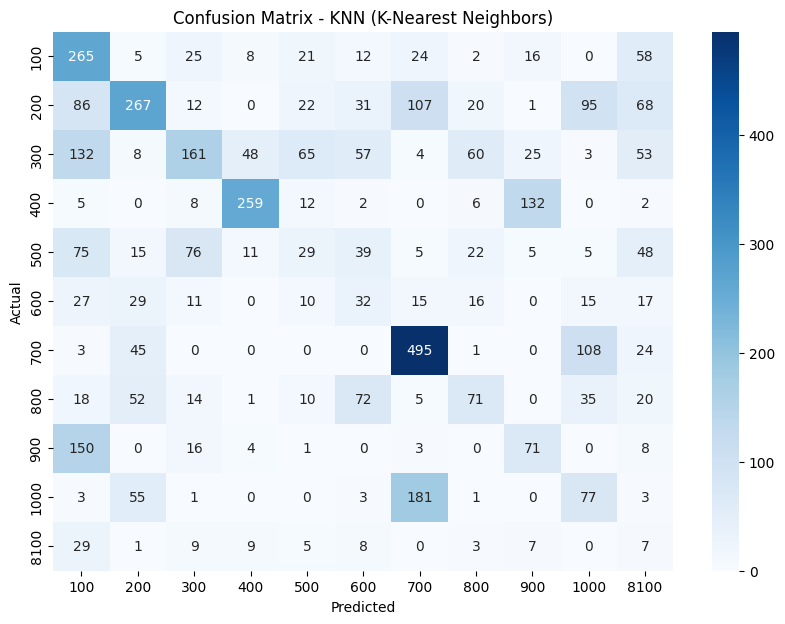


🔍 Đang huấn luyện mô hình: XGBoost


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:49:55] WARNING: /workspace/src/context.cc:43: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:49:55] WARNING: /workspace/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

         100       0.49      0.98      0.65       436
         200       0.47      0.43      0.44       709
         300       0.80      0.86      0.83       616
         400       0.86      0.86      0.86       426
         500       0.87      0.53      0.66       330
         600       0.11      0.06      0.08       172
         700       0.74      0.50      0.60       676
         800       0.79      0.52      0.63       298
         900       0.71      0.26      0.38       253
        1000       0.58      0.81      0.68       324
        8100       0.06      0.15      0.09        78

    accuracy                           0.61      4318
   macro avg       0.59      0.54      0.54      4318
weighted avg       0.65      0.61      0.61      4318



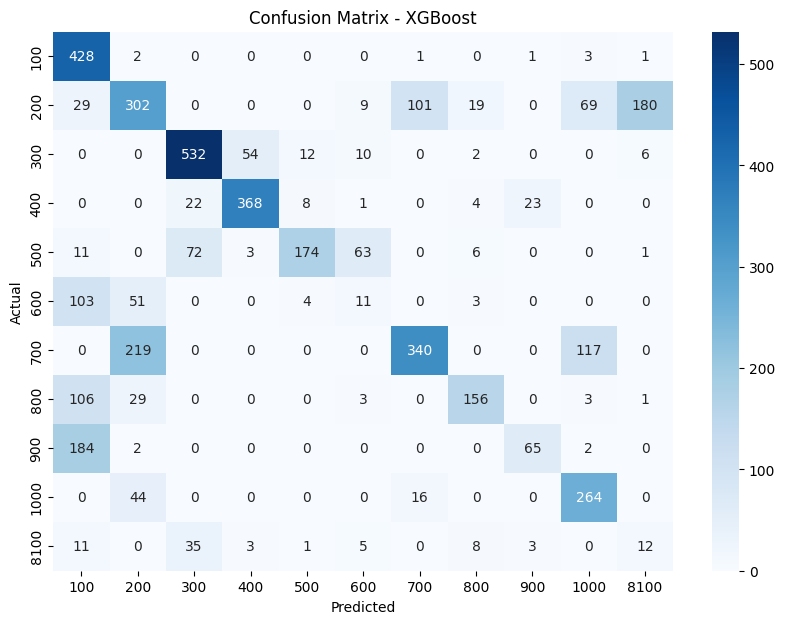


🔍 Đang huấn luyện mô hình: LightGBM
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.076856 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 81071
[LightGBM] [Info] Number of data points in the train set: 16654, number of used features: 318
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

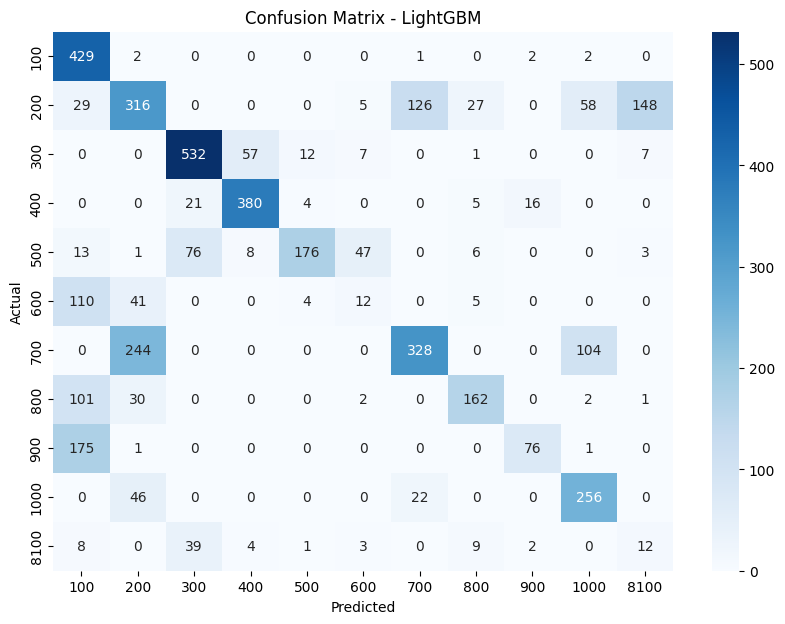

In [91]:
# Các model sẽ thử nghiệm
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42),
    "KNN (K-Nearest Neighbors)": KNeighborsClassifier(n_neighbors=7),
    "XGBoost": XGBClassifier
     (
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        random_state=42,
        tree_method='hist',
        device='cuda'
    ),
    "LightGBM": LGBMClassifier
     (
        n_estimators=200,
        learning_rate=0.1
      )
}

# Huấn luyện và đánh giá từng model
for model_name, model in models.items():
    print(f"\n🔍 Đang huấn luyện mô hình: {model_name}")
    model.fit(X_train_resampled, y_train_resampled)

    y_pred_encoded = model.predict(X_test)

    y_pred = label_encoder.inverse_transform(y_pred_encoded)
    y_test_original = label_encoder.inverse_transform(y_test_encoded)

    print(classification_report(y_test_original, y_pred))

    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion_matrix(y_test_original, y_pred), annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()